# Open to (Psychedelic) Experience

<img src=https://www.midjourney.com/app/jobs/b448b01a-2f65-4c8e-9aff-fc3bc4e6ac30/ width='500'>
    
By Jordan Loewen-Colón May 30th 2023

## The Business Problem

MindSpectrum Research Institute (fictional) is involved in clinical trials for psychedelic-assisted therapies: they conduct clinical trials to evaluate the efficacy and safety of psychedelic substances, such as psilocybin, MDMA, LSD, Ketamine, and Cannabis in combination with psychotherapy for treating specific mental health conditions like depression, anxiety, PTSD, or addiction. Efficient patient targeting ensures that individuals with the targeted conditions who are open to the use of psychedelics are recruited for the trials. Our team has been hired to help them with their patient recruitment campaign. They are looking to recruit individuals are are most likely to be willing to take a psychedelic but without necessarily self-selecting.

## Our Recommendations?

MindSpectrum Research Institute should target individuals:

1) Who score high on NEO-FFI-R Openness to experience, low on impulsiveness measured by BIS-11.

2) Who have never taken Legal Highs (new substances), Nicotine, and Amyl Nitrites

# Step 1 - Data Understanding

To make our recommendations, we analyzed the [Drug Consumptions (UCI)](https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci) from Kaggle.

We begin by importing the proper tools and then the data itself.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from scipy.stats import uniform, randint, pointbiserialr, ttest_ind
from tabulate import tabulate

%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv(r'D:\Git\phase_3\Drug_Consumption.csv', header= 0,
                        encoding= 'unicode_escape')

# Print the first five rows
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [47]:
# Check Data
print(df.shape)
df.info()

(1884, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 2

The dataset has 1884 entries and 31 columns with a mix of floats and objects. The personality scores (6:12) is measured on a Likert-based scale ranging from 0 (“Strongly Disagree”) to 4 (“Strongly Agree”) and then rendered as a float. The demographics have various sub categories, and the drug values are measured by recency (if ever) the substance has been consumed; CL0 being never used, and CL6 being used in the last day.

In [4]:
## Check for missing values
print(f"\n {'Nulls in Column'.title()} \n {df.isnull().sum()}")

## duplicate values
print(f"\n {'Duplicates'.title()} :- {len(df.loc[df.duplicated()])}")


 Nulls In Column 
 ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

 Duplicates :- 0


----
With "Semeron" the data collectors created a fictitous class of drug type to weed out people who would over identify drug use as a control.

In [5]:
## Semeron values
print(df['Semer'].value_counts())

CL0    1876
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64


We are looking to target just psychedelic drugs, so we will create a column that only includes cannabis, ecstasy, ketamine, LSD, and mushrooms.

In [6]:
#Create our Target Column
df_p = df.copy()
df_p = df_p.drop(columns=['ID'])
df_p['Psychedelics'] = ''
Psychonaut = df_p['Psychedelics']     

Psychedelics = ['Cannabis','Ecstasy','Ketamine','LSD','Mushrooms']

for i in range(0, len(df_p)):
    tot = 0
    for n in Psychedelics:
        if df_p[n][i] != "CL0":
            tot = tot + 1
        if tot > 0:
            Psychonaut.iat[i] = 1
        else:
            Psychonaut.iat[i] = 0

In [7]:
#Drop unnecessary columns
df_p = df_p.drop(columns=['Cannabis','Ecstasy','Ketamine','LSD','Mushrooms'], axis=1)
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1884 non-null   object 
 1   Gender        1884 non-null   object 
 2   Education     1884 non-null   object 
 3   Country       1884 non-null   object 
 4   Ethnicity     1884 non-null   object 
 5   Nscore        1884 non-null   float64
 6   Escore        1884 non-null   float64
 7   Oscore        1884 non-null   float64
 8   AScore        1884 non-null   float64
 9   Cscore        1884 non-null   float64
 10  Impulsive     1884 non-null   float64
 11  SS            1884 non-null   float64
 12  Alcohol       1884 non-null   object 
 13  Amphet        1884 non-null   object 
 14  Amyl          1884 non-null   object 
 15  Benzos        1884 non-null   object 
 16  Caff          1884 non-null   object 
 17  Choc          1884 non-null   object 
 18  Coke          1884 non-null 

In [8]:
#Check values
print(df_p['Psychedelics'].value_counts())

1    1494
0     390
Name: Psychedelics, dtype: int64


In [9]:
#drop any rows of individuals claiming to take Semer
df_p.drop(df_p.loc[df_p['Semer']!='CL0'].index, inplace=True)
print(df_p['Semer'].value_counts())

CL0    1876
Name: Semer, dtype: int64


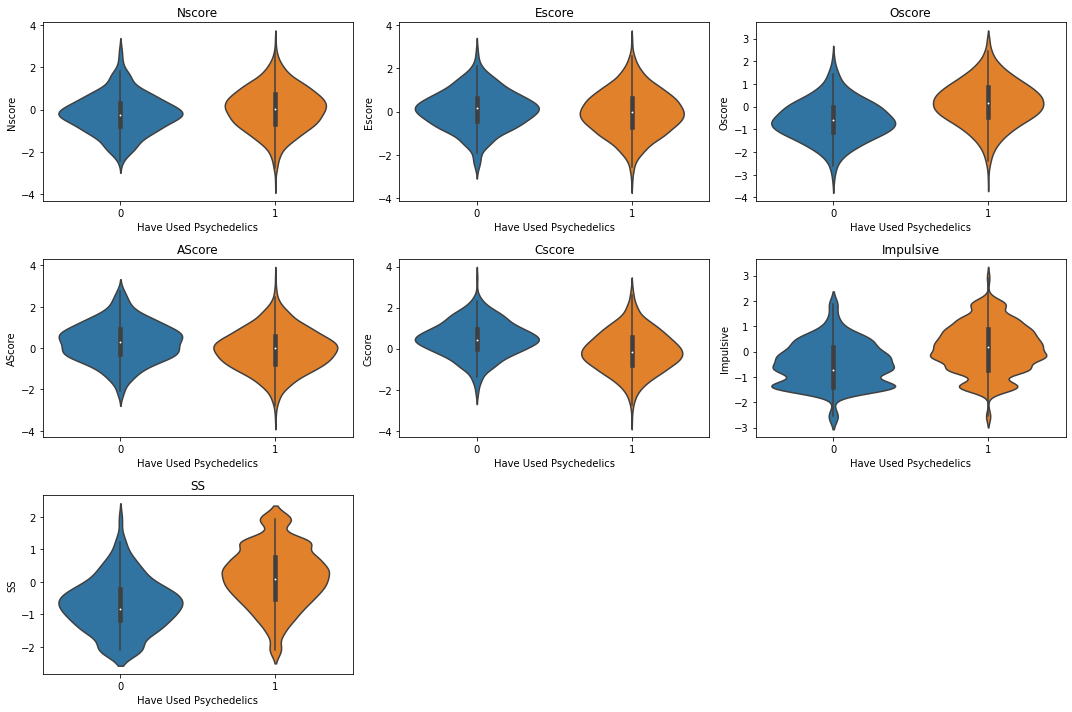

In [10]:
numerical_columns = df_p.columns[5:12]

# Define the number of columns and rows for the subplots matrix
num_cols = 3  # Number of columns
num_rows = math.ceil(len(numerical_columns) / num_cols)  # Number of rows

# Create the subplots matrix
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i]  # Get the current subplot

    sns.violinplot(x=df_p['Psychedelics'], y=df_p[column], ax=ax)
    ax.set_xlabel('Have Used Psychedelics')
    ax.set_ylabel(column)
    ax.set_title(f'{column}')

# Hide any unused subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [11]:
#create our train test split
y = df_p['Psychedelics']
y = y.astype('int')
X = df_p.drop(columns=['Psychedelics'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Print out the sizes to verify
shape_table = [['Original', X.shape, y.shape], ['Training', X_train.shape, y_train.shape], 
         ['Testing', X_test.shape, y_test.shape]]
print(tabulate(shape_table, headers=['Dataset', 'X shape', 'y shape']))

Dataset    X shape     y shape
---------  ----------  ---------
Original   (1876, 26)  (1876,)
Training   (1407, 26)  (1407,)
Testing    (469, 26)   (469,)


## Create Pipeline

In [13]:
# Create the preprocessing steps for numerical data
subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])

# Create the preprocessing steps for categorical data
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

# Combine the preprocessing steps for numerical and categorical data
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [5, 6, 7, 8, 9, 10, 11]),
                                         ('subpipe_cat', subpipe_cat, [0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17,
                                                                  18, 19, 20, 21, 22, 23, 24, 25])],
                           remainder='passthrough')

## Logistic Regression

In [14]:
# Create the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=10000)

# Update the pipeline to include the logistic regression model
log_pipeline = Pipeline([
    ('preprocess', CT),
    ('classifier', logistic_regression_model)
])

# Fit the pipeline to the training data
log_pipeline.fit(X_train, y_train)

# Get the predicted labels for the training data
y_train_pred = log_pipeline.predict(X_train)

# Compute the precision of the logistic regression model
precision = precision_score(y_train, y_train_pred)

print(f"Precision: {precision}")

Precision: 0.9532374100719424


In [15]:
# Predict the labels for the test data
y_test_pred = log_pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       103
           1       0.94      0.93      0.93       366

    accuracy                           0.90       469
   macro avg       0.85      0.85      0.85       469
weighted avg       0.90      0.90      0.90       469



In [16]:
# Get column names after OneHotEncoding
cat_cols_transformed = log_pipeline.named_steps['preprocess'].named_transformers_['subpipe_cat'].named_steps['ohe'].get_feature_names_out(input_features=X_train.columns[[0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]].tolist())

# Concatenate with numerical column names to get the final order
feature_names_ordered = np.concatenate([X_train.columns[5:12], cat_cols_transformed])

# Get feature coefficients from the logistic regression model
coefficients = log_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame with feature names and their coefficients
coefficients_df = pd.DataFrame({'feature': feature_names_ordered, 'coefficient': coefficients})

# Sort DataFrame by coefficient magnitude
coefficients_df['abs_coefficient'] = abs(coefficients_df['coefficient'])
coefficients_df = coefficients_df.sort_values(by='abs_coefficient', ascending=False)

# Filter DataFrame to include only desired features
num_features_df = coefficients_df[coefficients_df['feature'].isin(X_train.columns[5:12])]

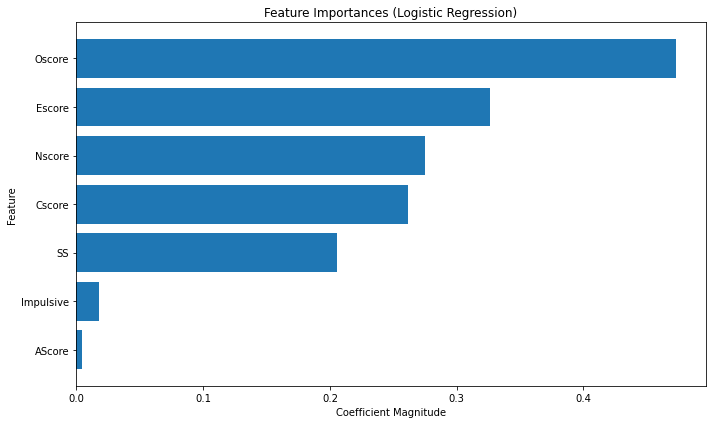

In [17]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(num_features_df['feature'], num_features_df['abs_coefficient'])
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Feature Importances (Logistic Regression)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

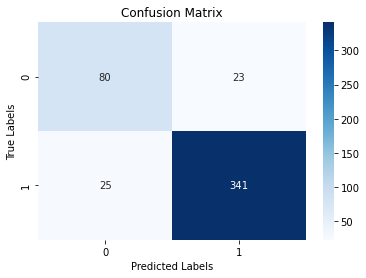

In [18]:
# Predict the labels for the test set
y_pred = log_pipeline.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

In [19]:
# Create the random forest classifier model
random_forest_model = RandomForestClassifier()

# Update the pipeline to include the random forest classifier model
rfc_pipeline = Pipeline([
    ('preprocess', CT),  # Preprocessing steps remain the same
    ('classifier', random_forest_model)  # Replace with random forest classifier
])

# Fit the pipeline to the training data
rfc_pipeline.fit(X_train, y_train)

# Predict the labels for the training data
y_train_pred_rfc = rfc_pipeline.predict(X_train)

# Compute the precision of the random forest model
precision_rfc = precision_score(y_train, y_train_pred_rfc)

print(f"RFC Precision: {precision_rfc}")

RFC Precision: 1.0


In [20]:
# Define the parameter grid for the random forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc_pipeline, param_grid, cv=5, scoring='precision', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters:", best_params)

Best parameters: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [21]:
# Create a new model with the best parameters
best_rfc = RandomForestClassifier(n_estimators=best_params['classifier__n_estimators'],
                                       max_depth=best_params['classifier__max_depth'],
                                       min_samples_split=best_params['classifier__min_samples_split'],
                                       min_samples_leaf=best_params['classifier__min_samples_leaf'])

# Update the pipeline to include the new random forest classifier model
best_rfc_pipeline = Pipeline([
    ('preprocess', CT),  # Preprocessing steps remain the same
    ('classifier', best_rfc)  # Replace with the new random forest classifier
])

# Fit the pipeline to the training data
best_rfc_pipeline.fit(X_train, y_train)

# Predict the labels for the training data using the best model
y_train_pred_best = grid_search.predict(X_train)

# Compute the precision of the best model
precision_best = precision_score(y_train, y_train_pred_best)

print(f"Best Model Training Precision: {precision_best}")

Best Model Training Precision: 1.0


In [22]:
# Predict the labels for the test data
y_test_pred = best_rfc_pipeline.predict(X_test)

# Print the classification report for test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       103
           1       0.92      0.95      0.93       366

    accuracy                           0.90       469
   macro avg       0.86      0.82      0.84       469
weighted avg       0.89      0.90      0.89       469



### Get Feature Importances

In [23]:
# Get column names after OneHotEncoding
cat_cols_transformed = grid_search.best_estimator_.named_steps['preprocess'].named_transformers_['subpipe_cat'].named_steps['ohe'].get_feature_names_out(input_features=X_train.columns[[0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]].tolist())

# Concatenate with numerical column names to get the final order
feature_names_ordered = np.concatenate([X_train.columns[5:12], cat_cols_transformed])

# Get feature importances from the best RFC
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a DataFrame with feature names and their importance
importances_df = pd.DataFrame({'feature': feature_names_ordered, 'importance': importances})

# Sort DataFrame by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Filter DataFrame to include only desired features
num_features_df = importances_df[importances_df['feature'].isin(X_train.columns[5:12])]

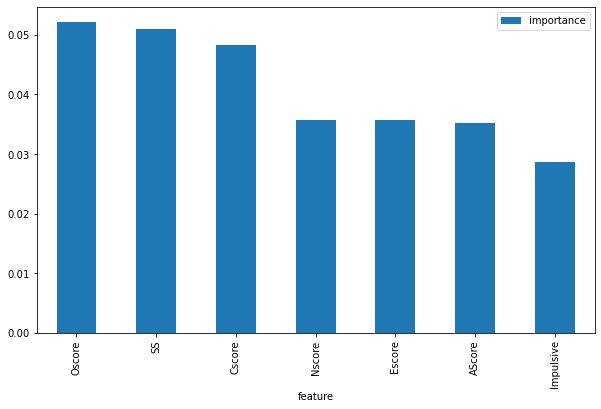

In [24]:
# Plot the feature importances for the numerical features
num_features_df.plot(kind='bar', x='feature', y='importance', figsize=(10,6));

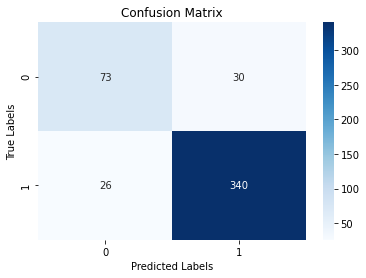

In [25]:
# Predict the labels for the test set using the best model
y_pred = grid_search.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

In [26]:
gbc_model_pipe = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_model_pipe.fit(X_train, y_train)

print(gbc_model_pipe.score(X_train, y_train))

0.9488272921108742


In [27]:
# Define the parameter distribution for the Gradient Boosting Classifier
param_dist = {
    'gbc__n_estimators': randint(50, 200),
    'gbc__learning_rate': [0.01, 0.1, 1],
    'gbc__max_depth': randint(1, 40),
    'gbc__min_samples_split': randint(2, 11),
    'gbc__min_samples_leaf': randint(1, 5),
    'gbc__subsample': [0.5, 0.75, 1]
}

# Create the RandomizedSearchCV object
random_search_gbc = RandomizedSearchCV(gbc_model_pipe, param_dist, n_iter=100, cv=5, scoring='precision', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_gbc.fit(X_train, y_train)

# Get the best parameters
best_params_gbc = random_search_gbc.best_params_

print("Best parameters:", best_params_gbc)

Best parameters: {'gbc__learning_rate': 0.1, 'gbc__max_depth': 3, 'gbc__min_samples_leaf': 1, 'gbc__min_samples_split': 6, 'gbc__n_estimators': 191, 'gbc__subsample': 1}


In [28]:
# Use the best parameters to create a new pipeline
best_gbc_model = GradientBoostingClassifier(n_estimators=best_params_gbc['gbc__n_estimators'],
                                            learning_rate=best_params_gbc['gbc__learning_rate'],
                                            max_depth=best_params_gbc['gbc__max_depth'],
                                            min_samples_split=best_params_gbc['gbc__min_samples_split'],
                                            min_samples_leaf=best_params_gbc['gbc__min_samples_leaf'],
                                            subsample=best_params_gbc['gbc__subsample'],
                                            random_state=42)

best_gbc_pipeline = Pipeline([
    ('preprocess', CT),  # Preprocessing steps remain the same
    ('classifier', best_gbc_model)  # Replace with the new gradient boosting classifier
])

# Fit the pipeline to the training data
best_gbc_pipeline.fit(X_train, y_train)

# Evaluate on the training data
print(f"GBC Training Score: {best_gbc_pipeline.score(X_train, y_train)}")

GBC Training Score: 0.9779673063255153


In [29]:
# Predict the labels for the test data
y_test_pred_gbc = best_gbc_pipeline.predict(X_test)

# Compute the precision score for the Gradient Boosting Classifier
precision_gbc = precision_score(y_test, y_test_pred_gbc)

# Print the classification report for test data
print(classification_report(y_test, y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       103
           1       0.92      0.92      0.92       366

    accuracy                           0.87       469
   macro avg       0.82      0.82      0.82       469
weighted avg       0.87      0.87      0.87       469



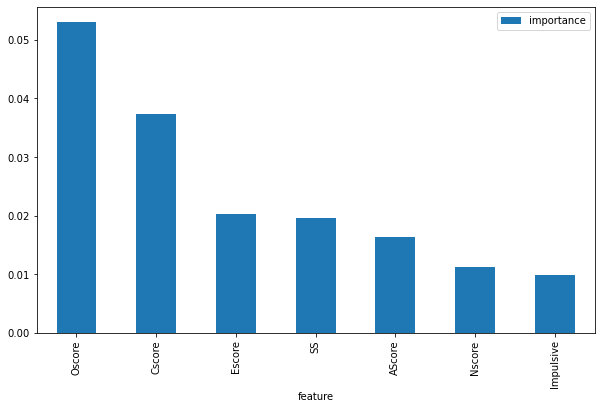

In [30]:
# Get column names after OneHotEncoding
cat_cols_transformed = best_gbc_pipeline.named_steps['preprocess'].named_transformers_['subpipe_cat'].named_steps['ohe'].get_feature_names_out(input_features=X_train.columns[[0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]].tolist())

# Concatenate with numerical column names to get the final order
feature_names_ordered = np.concatenate([X_train.columns[5:12], cat_cols_transformed])

# Get feature importances from the Gradient Boosting Classifier in the final pipeline
importances = best_gbc_pipeline.named_steps['classifier'].feature_importances_

# Check if the lengths of feature names and importances match
assert len(importances) == len(feature_names_ordered), "Lengths of feature names and importances do not match."

# Create a DataFrame with feature names and their importance
importances_df = pd.DataFrame({'feature': feature_names_ordered, 'importance': importances})

# Sort DataFrame by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Filter DataFrame to include only desired features
num_features_df = importances_df[importances_df['feature'].isin(X_train.columns[5:12])]

# Plot the feature importances for the numerical features
num_features_df.plot(kind='bar', x='feature', y='importance', figsize=(10,6));

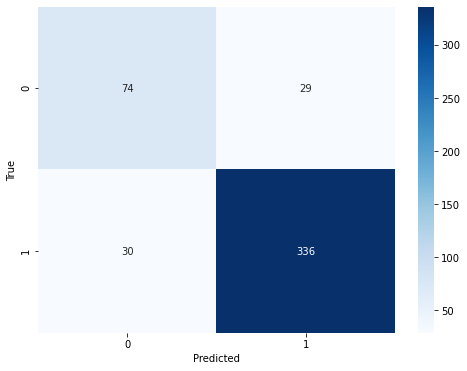

In [31]:
# Generate the predictions for the test set
y_test_pred_gbc = best_gbc_pipeline.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_gbc)

# Display the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model Comparison

In [33]:
# Define the models and their predictions
models = [('Logistic Regression', log_pipeline), ('RFC', best_rfc_pipeline), ('GBC', best_gbc_pipeline)]

# Define the evaluation metrics
metrics = [('accuracy', accuracy_score), ('precision', precision_score),
           ('recall', recall_score), ('F1-score', f1_score)]

# Iterate over models and metrics to compute and print the scores
for model_name, model in models:
    predictions = model.predict(X_test)
    print(f"\nModel: {model_name}")
    for metric_name, metric_func in metrics:
        score = metric_func(y_test, predictions)
        print(f"{metric_name}: {score}")


Model: Logistic Regression
accuracy: 0.8976545842217484
precision: 0.9368131868131868
recall: 0.9316939890710383
F1-score: 0.9342465753424658

Model: RFC
accuracy: 0.8955223880597015
precision: 0.9182058047493403
recall: 0.9508196721311475
F1-score: 0.934228187919463

Model: GBC
accuracy: 0.8742004264392325
precision: 0.9205479452054794
recall: 0.9180327868852459
F1-score: 0.9192886456908346


## Digging Deeper


In [37]:
# Fit the pipeline to the training data
log_pipeline.fit(X_train, y_train)

# Get the logistic regression model from the pipeline
logistic_regression_model = log_pipeline.named_steps['classifier']

# Get the coefficient values from the logistic regression model
coefficients = logistic_regression_model.coef_[0]

# Get column names after preprocessing
cat_cols_transformed = log_pipeline.named_steps['preprocess'].named_transformers_['subpipe_cat'].named_steps['ohe'].get_feature_names_out(input_features=X_train.columns[[0, 1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]].tolist())
feature_names_ordered = np.concatenate([X_train.columns[5:12], cat_cols_transformed])

# Create a DataFrame with feature names and their absolute coefficients
coefficients_df = pd.DataFrame({'feature': feature_names_ordered, 'coefficient': abs(coefficients)})

# Sort the DataFrame by coefficient magnitude in descending order
coefficients_df = coefficients_df.sort_values(by='coefficient', ascending=False)

# Display the most influential features
print(coefficients_df.head(20))  # Display top 10 influential features

                         feature  coefficient
101                   Legalh_CL0     1.791500
115                 Nicotine_CL0     1.595782
52                      Amyl_CL0     1.542390
80                      Coke_CL0     1.376952
45                    Amphet_CL0     1.343170
38                   Alcohol_CL0     1.225124
53                      Amyl_CL1     1.063582
81                      Coke_CL1     1.047385
46                    Amphet_CL1     1.013011
118                 Nicotine_CL3     0.983424
30                   Country_USA     0.892543
28   Country_Republic of Ireland     0.788134
113                     Meth_CL5     0.779733
36               Ethnicity_Other     0.757255
69                      Caff_CL3     0.680665
47                    Amphet_CL2     0.662919
102                   Legalh_CL1     0.649968
32               Ethnicity_Black     0.629921
12                       Age_65+     0.602255
34   Ethnicity_Mixed-White/Asian     0.586940
